## Cross-shelf transport figure

In [1]:
#import gsw as sw # Gibbs seawater package

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline

from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import xarray as xr
import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

In [2]:
sns.set_context('paper')
sns.set_style('white')

In [3]:
def plotCSPos(ax,CS1,CS2,CS3,CS4):
    ax.axvline(CS1,color='k',linestyle=':')
    ax.axvline(CS2,color='k',linestyle=':')
    ax.axvline(CS3,color='k',linestyle=':')
    ax.axvline(CS4,color='k',linestyle=':')
    
def unstagger_xarray(qty, index):
    """Interpolate u, v, or w component values to values at grid cell centres.
    
    Named indexing requires that input arrays are XArray DataArrays.

    :arg qty: u, v, or w component values
    :type qty: :py:class:`xarray.DataArray`
    
    :arg index: index name along which to centre
        (generally one of 'gridX', 'gridY', or 'depth')
    :type index: str

    :returns qty: u, v, or w component values at grid cell centres
    :rtype: :py:class:`xarray.DataArray`
    """
    
    qty = (qty + qty.shift(**{index: 1})) / 2
    
    return qty


In [4]:
#Exp
CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc' 
CGridOut = Dataset(CGrid)

CGridNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc' 
CGridNoCOut = Dataset(CGridNoC)

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/ptracersGlob.nc' 
PtracersOut = Dataset(Ptracers)

PtracersNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/ptracersGlob.nc' 
PtracersOutNoC = Dataset(PtracersNoC)

State = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc' 
StateNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/stateGlob.nc' 

flux_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/FluxTR01Glob.nc'
fluxNoC_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/FluxTR01Glob.nc'

grid = xr.open_dataset(CGrid)

flux_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/FluxTR01Glob.nc'
fluxNoC_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/FluxTR01Glob.nc'

flux = xr.open_dataset(flux_file)
fluxNoC = xr.open_dataset(fluxNoC_file)

state = xr.open_dataset(State)


In [5]:
adv_flux_AP = (flux.ADVyTr01[7:13,:,227,:]-fluxNoC.ADVyTr01[7:13,:,227,:]).mean(dim='T')
dif_flux_AP = (flux.DFyETr01[7:13,:,227,:]-fluxNoC.DFyETr01[7:13,:,227,:]).mean(dim='T')

Flux = adv_flux_AP + dif_flux_AP

In [6]:
adv_fluxV_AP = (flux.ADVrTr01[7:13,30,:,:]-fluxNoC.ADVrTr01[7:13,30,:,:]).mean(dim='T')
dif_fluxV_AP = (flux.DFrITr01[7:13,30,:,:]+flux.DFrETr01[7:13,30,:,:]-
                (fluxNoC.DFrITr01[7:13,30,:,:]+fluxNoC.DFrETr01[7:13,30,:,:])).mean(dim='T')
FluxV = adv_fluxV_AP + dif_fluxV_AP  

In [7]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 22 # number of tracers in total (CNT =22, 3D = 4, total = 19)

rc = CGridNoCOut.variables['RC']
dxf = CGridNoCOut.variables['dxF']
xc = rout.getField(CGridNoC, 'XC') # x coords tracer cells
yc = rout.getField(CGridNoC, 'YC') # y coords tracer cells

rA = rout.getField(CGridNoC, 'rA') 

drF = CGridNoCOut.variables['drF'] # vertical distance between faces
drC = CGridNoCOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGridNoC, 'HFacC')
mask_NoC = rout.getMask(CGridNoC, 'HFacC')



times = np.arange(0,nt,1)

#print(drC[:])
#print(np.shape(drC))

In [8]:
import canyon_records 
import nocanyon_records

records = canyon_records.main()
recordsNoC = nocanyon_records.main()

In [9]:
ii=0
for rec in records:
    print(ii,rec.name,rec.f)
    ii=ii+1
    
select_rec=[0]

0 CNTDIFF_run38 9.66e-05
1 CNTDIFF_run37 9.66e-05
2 CNTDIFF_run36 9.66e-05
3 CNTDIFF_run45 9.66e-05
4 CNTDIFF_run73 9.66e-05
5 CNTDIFF_run75 9.66e-05
6 CNTDIFF_run67 0.0001
7 CNTDIFF_run51 7.68e-05
8 CNTDIFF_run69 8.6e-05
9 CNTDIFF_run71 6.4e-05
10 3DVISC_run01 9.66e-05
11 3DVISC_run02 9.66e-05
12 3DVISC_run03 9.66e-05
13 3DVISC_run04 9.66e-05
14 3DVISC_run05 9.66e-05
15 3DVISC_run06 9.66e-05
16 LOWER_BF_run01 9.66e-05
17 LOW_BF_run01 9.66e-05
18 LOWEST_BF_run01 9.66e-05
19 LOWEST_BF_run03 9.66e-05
20 LOWEST_BF_run05 9.66e-05
21 LOWEST_BF_run07 7e-05
22 LOWEST_BF_run11 9.66e-05


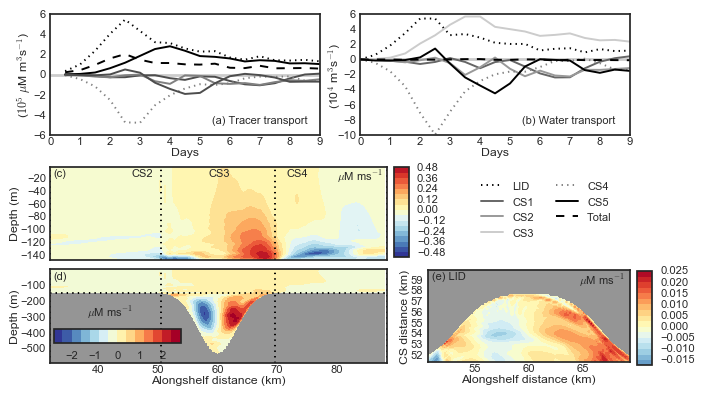

In [10]:
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (7.48,4.5)) # full page

gs = gspec.GridSpec(2, 1, height_ratios=[0.8,1.3])
gs0 = gspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0,0],wspace=0.15)
gs1 = gspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[1,0],hspace=0.1,wspace=0.15,width_ratios=[1,0.6])

ax0 = plt.subplot(gs0[0,0])
ax1 = plt.subplot(gs0[0,1])
ax2 = plt.subplot(gs1[0,0],xticks=[])
ax3 = plt.subplot(gs1[1,0])
ax4 = plt.subplot(gs1[1,1])

ii=7

yind = 227
areas = (np.expand_dims(grid.dxF.isel(X=slice(60,300),Y=yind).data,0))*(np.expand_dims(grid.drF.isel(Z=slice(0,60)).data,1))

# Full shelf ---------------------------------------------------------------------------
cnt=ax3.contourf(grid.X.isel(X=slice(60,300))/1000,grid.Z.isel(Z=slice(0,60)),
                Flux.isel(Zmd000090=slice(0,60),X=slice(60,300))/areas,16,cmap='RdYlBu_r',vmax=2.5, vmin=-2.5)
ax3.contourf(grid.X.isel(X=slice(60,300))/1000,grid.Z.isel(Z=slice(0,60)),
             grid.HFacC.isel(Z=slice(0,60),Y=227,X=slice(60,300)),[0,0.1])

cbar_ax = f.add_axes([0.13, 0.17, 0.17, 0.03])
cb=f.colorbar(cnt, cax=cbar_ax,orientation='horizontal',ticks=[-2,-1,0,1,2])

ax3.axhline(y=grid.Z[30], linestyle=':',color='k')
ax3.set_xlabel('Alongshelf distance (km)',labelpad=0.5)
ax3.set_ylabel('Depth (m)',labelpad=0.5)

ax3.text(0.11,0.5,'$\mu$M ms$^{-1}$',transform=ax3.transAxes)


# Zoom shelf   ---------------------------------------------------------------------------
cnt=ax2.contourf(grid.X.isel(X=slice(60,300))/1000,grid.Z.isel(Z=slice(0,30)),
                Flux.isel(Zmd000090=slice(0,30),X=slice(60,300))/areas[:30,:],16,cmap='RdYlBu_r',vmax=0.5, vmin=-0.5)
ax2.contourf(grid.X.isel(X=slice(60,300))/1000,grid.Z.isel(Z=slice(0,30)),
            grid.HFacC.isel(Z=slice(0,30),Y=227,X=slice(60,300)),[0,0.1])

cbar_ax = f.add_axes([0.585, 0.36, 0.02, 0.2])
cb=f.colorbar(cnt, cax=cbar_ax)

ax2.set_ylabel('Depth (m)',labelpad=0.5)
ax2.text(0.85,0.86,'$\mu$M ms$^{-1}$',transform=ax2.transAxes)    


# Time series ---------------------------------------------------------------------------

ax0.axhline(0,color='0.8',linewidth=2)
ax1.axhline(0,color='0.8',linewidth=2)

ind = 0
file = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))+
        'advTracer_CS_transports.nc')
filedif = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))+
        'difTracer_CS_transports.nc')
fileNoC = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(recordsNoC[ind].exp_code,recordsNoC[ind].run_num))+
        'advTracer_CS_transports.nc')
dfcan = xr.open_dataset(file)
dfdif = xr.open_dataset(filedif)
dfnoc = xr.open_dataset(fileNoC)

vertical = (dfdif.Vert_dif_trans_sb + dfcan.Vert_adv_trans_sb)   
ax0.plot(np.arange(1,19,1)/2.0,(vertical)/1E5,':',color='k')
ax0.plot(np.arange(1,19,1)/2.0,(dfcan.CS1_adv_trans -dfnoc.CS1_adv_trans )/1E5,color='0.3')
ax0.plot(np.arange(1,19,1)/2.0,(dfcan.CS2_adv_trans - (dfnoc.CS2_adv_trans ))/1E5,color='0.5')
ax0.plot(np.arange(1,19,1)/2.0,(dfcan.CS3_adv_trans - (dfnoc.CS3_adv_trans ))/1E5,color='k')
ax0.plot(np.arange(1,19,1)/2.0,(dfcan.CS4_adv_trans - (dfnoc.CS4_adv_trans ))/1E5,':',color='0.5')
ax0.plot(np.arange(1,19,1)/2.0,(dfcan.CS5_adv_trans - (dfnoc.CS5_adv_trans ))/1E5,color='0.3')
    
total = ( (dfcan.CS1_adv_trans )- (dfnoc.CS1_adv_trans ) +
          (dfcan.CS2_adv_trans )- (dfnoc.CS2_adv_trans ) +
          (dfcan.CS3_adv_trans )- (dfnoc.CS3_adv_trans ) +
          (dfcan.CS4_adv_trans )- (dfnoc.CS4_adv_trans ) +
          (dfcan.CS5_adv_trans )- (dfnoc.CS5_adv_trans ) +
         vertical)
    
ax0.plot(np.arange(1,19,1)/2.0,total/1E5,'--',color='k')
ax0.set_xlabel('Days',labelpad=0.5)
ax0.set_ylabel('($10^5$ $\mu$M m$^3$s$^{-1}$)',labelpad=0.5)

file2 = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,records[ind].run_num))+
        'water_CS_transports.nc')
fileNoC2 = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(recordsNoC[ind].exp_code,recordsNoC[ind].run_num))+
        'water_CS_transports.nc')
dfcan2 = xr.open_dataset(file2)
dfnoc2 = xr.open_dataset(fileNoC2)
    
ax1.plot(np.arange(19)/2.0,(dfcan2.Vert_water_trans_sb-dfnoc2.Vert_water_trans_sb)/1E4,':',color='k',label = 'LID')
ax1.plot(np.arange(19)/2.0,(dfcan2.CS1_water_trans-dfnoc2.CS1_water_trans)/1E4,color='0.4',label = 'CS1')
ax1.plot(np.arange(19)/2.0,(dfcan2.CS2_water_trans-dfnoc2.CS2_water_trans)/1E4,color='0.6',label = 'CS2')
ax1.plot(np.arange(19)/2.0,(dfcan2.CS3_water_trans-dfnoc2.CS3_water_trans)/1E4,color='0.8',label = 'CS3')
ax1.plot(np.arange(19)/2.0,(dfcan2.CS4_water_trans-dfnoc2.CS4_water_trans)/1E4,':',color='0.5',label= 'CS4')
ax1.plot(np.arange(19)/2.0,(dfcan2.CS5_water_trans-dfnoc2.CS5_water_trans)/1E4,color='k',label = 'CS5')
    
total = (dfcan2.CS1_water_trans-dfnoc2.CS1_water_trans +
         dfcan2.CS2_water_trans-dfnoc2.CS2_water_trans +
         dfcan2.CS3_water_trans-dfnoc2.CS3_water_trans +
         dfcan2.CS4_water_trans-dfnoc2.CS4_water_trans +
         dfcan2.CS5_water_trans-dfnoc2.CS5_water_trans +
         dfcan2.Vert_water_trans_sb-dfnoc2.Vert_water_trans_sb)
    
ax1.plot(np.arange(19)/2.0,total/1E4,'--',color='k',label = 'Total')
ax1.set_xlabel('Days',labelpad=0.5)
ax1.set_ylabel('(10$^{4}$ m$^3$s$^{-1}$)',labelpad=-4)

# Vertical section ---------------------------------------------------------------------------

cnt=ax4.contourf(grid.X.isel(X=slice(120,240))/1000,grid.Y.isel(Y=slice(225,270))/1000,
                 (FluxV.isel(X=slice(120,240),Y=slice(225,270)).data)/(grid.rA[225:270,120:240]),
                 16,cmap='RdYlBu_r',vmax=0.025, vmin=-0.025)
ax4.contourf(grid.X.isel(X=slice(120,240))/1000,grid.Y.isel(Y=slice(225,270))/1000,
            grid.HFacC.isel(Z=30,X=slice(120,240),Y=slice(225,270)),[0,0.1])

cbar_ax = f.add_axes([0.91, 0.12, 0.02, 0.21])
cb=f.colorbar(cnt, cax=cbar_ax)
ax4.set_aspect(1)
ax4.set_xlabel('Alongshelf distance (km)',labelpad=0.5)
ax4.set_ylabel('CS distance (km)',labelpad=0.5)
ax4.text(0.75,0.85,'$\mu$M ms$^{-1}$',transform=ax4.transAxes)    

# General looks
ax0.text(0.6,0.1,'(a) Tracer transport',transform=ax0.transAxes)
ax1.text(0.6,0.1,'(b) Water transport',transform=ax1.transAxes)    
ax2.text(0.01,0.9,'(c)',transform=ax2.transAxes)
ax3.text(0.01,0.9,'(d)',transform=ax3.transAxes)    
ax4.text(0.02,0.9,'(e) LID',transform=ax4.transAxes)    

ax2.text(0.24,0.9,'CS2',transform=ax2.transAxes)
ax2.text(0.47,0.9,'CS3',transform=ax2.transAxes)
ax2.text(0.7,0.9,'CS4',transform=ax2.transAxes)


plotCSPos(ax2,xc[1,60]/1000,xc[1,120]/1000,xc[1,240]/1000,xc[1,300]/1000)
plotCSPos(ax3,xc[1,60]/1000,xc[1,120]/1000,xc[1,240]/1000,xc[1,300]/1000)


#ax2.set_ylim(0,2.2)
#ax3.set_ylim(0,15)

ax1.legend(ncol=2,bbox_to_anchor=(0.97,-0.3))

ax0.tick_params(axis='x', pad=1)
ax1.tick_params(axis='x', pad=1)
ax3.tick_params(axis='x', pad=1)
ax4.tick_params(axis='x', pad=1)

ax0.tick_params(axis='y', pad=3)
ax1.tick_params(axis='y', pad=3)
ax2.tick_params(axis='y', pad=3)
ax3.tick_params(axis='y', pad=3)
ax4.tick_params(axis='y', pad=3)


plt.savefig('figure5.eps',format='eps',bbox_inches='tight')


## What is the weird line at about 250 m?

When I plotted the flux output it had units of $\mu$M m^3s$^{-1}$, but I'm looking a at an alongshore slice, so I acctually want to see $\mu$M ms$^{-1}$, the concentration passing by per unit area. Since I was not dividing by the area $dA=dxdz$, a weiid line appeared at the depths where the vertical resolution changes, those are 175 m (from 5 to 10 m)and 270 m (from 10 to 20 m). The most evident line was the one at 175 m. The same effect happens horizontaly but is hard to see because the resolution changes much more smoothly.

The fix is that I have to divide the cross-shore flux ADVyTr01 by the area dXDZ to get $\mu$M ms$^{-1}$. I figured this out because the lines do not appear when I plot the cross shore velocty through the plane y[227, y[230] or y[240].

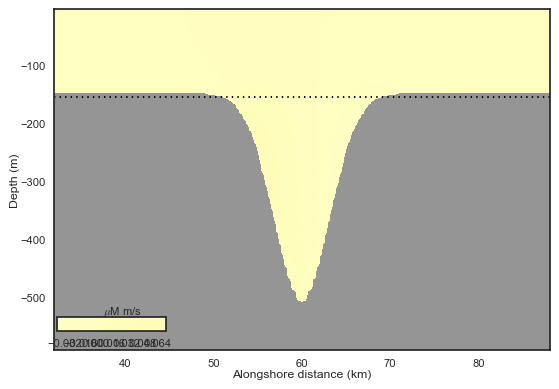

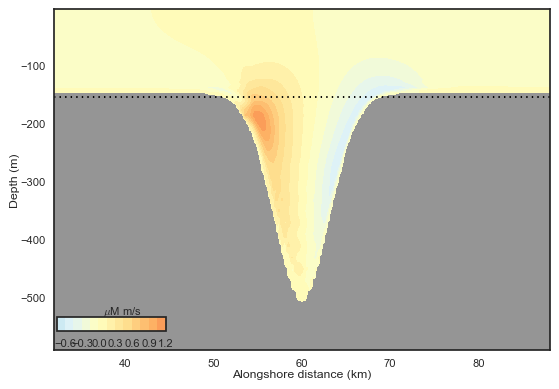

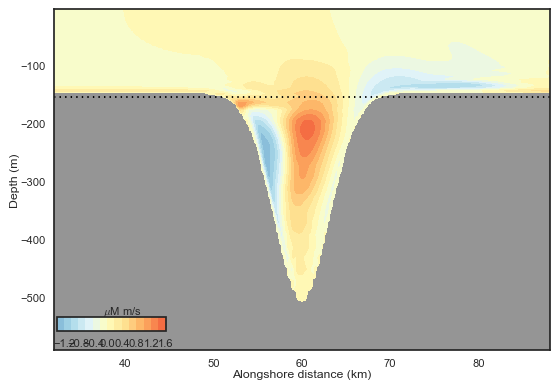

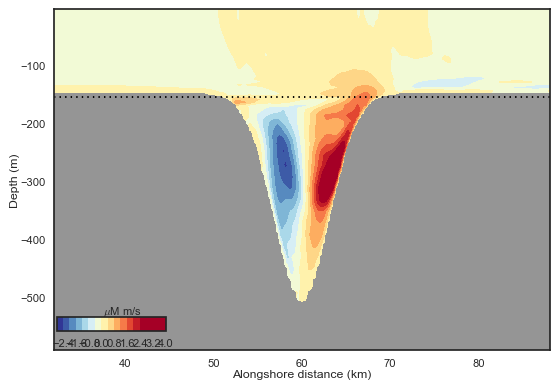

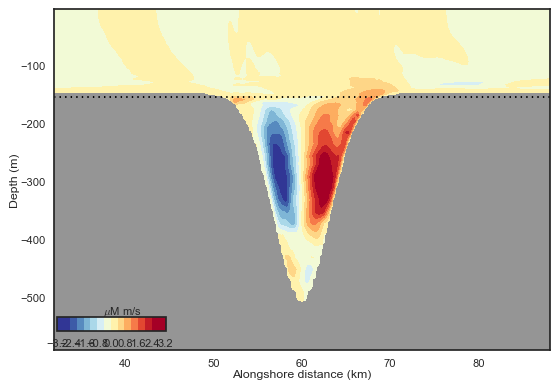

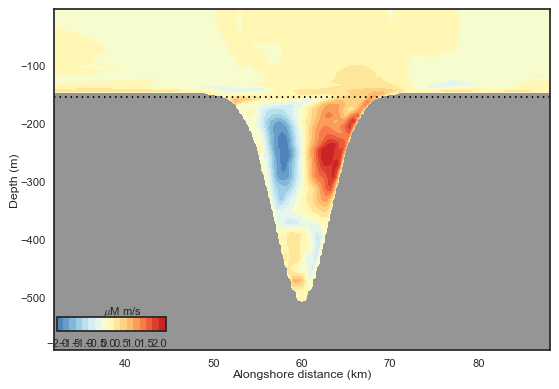

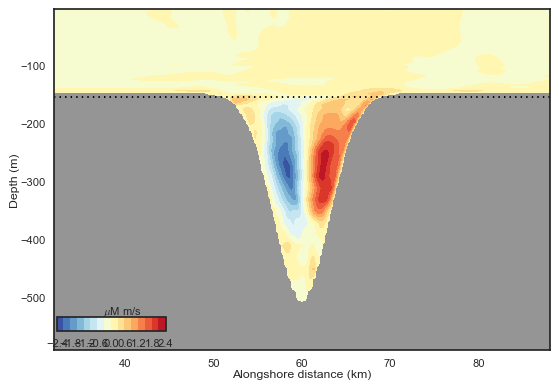

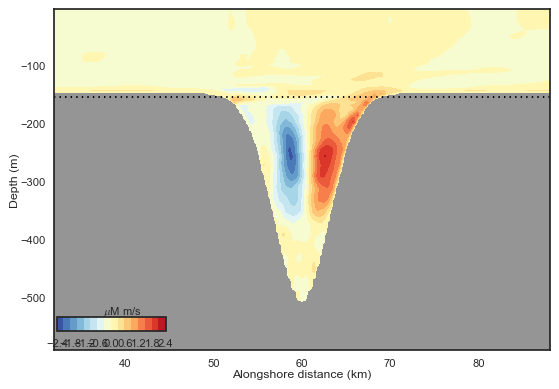

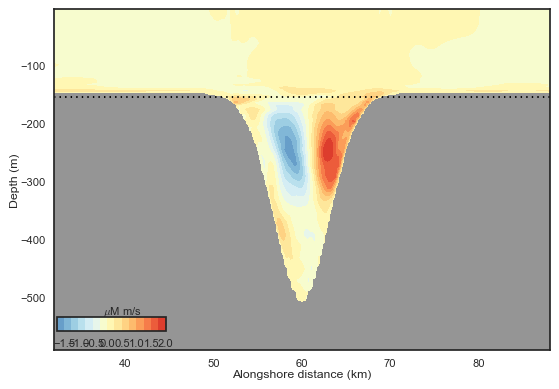

In [39]:
plt.rcParams['font.size'] = 8.0

yind = 230

areas = (np.expand_dims(grid.dxF.isel(X=slice(60,300),Y=yind).data,0))*(np.expand_dims(grid.drF.isel(Z=slice(0,60)).data,1))

for tt in [0,2,4,6,8,10,12,14,16]:
    
    adv_flux_AP = (flux.ADVyTr01[tt,:,yind,:])#.mean(dim='T')
    dif_flux_AP = (flux.DFyETr01[tt,:,yind,:])#.mean(dim='T')
    Flux = adv_flux_AP + dif_flux_AP
    
    #Flux = state.V[tt,:,yind,:]
    
    fig,ax0 = plt.subplots(1,1)

    ii=7

    ## Full shelf ---------------------------------------------------------------------------
    cnt=ax0.contourf(grid.X.isel(X=slice(60,300))/1000,grid.Z.isel(Z=slice(0,60)),
                    (Flux.isel(Zmd000090=slice(0,60),X=slice(60,300)).data/areas),16,cmap='RdYlBu_r',vmax=2.5,vmin=-2.5)
    ax0.contourf(grid.X.isel(X=slice(60,300))/1000,grid.Z.isel(Z=slice(0,60)),
                 grid.HFacC.isel(Z=slice(0,60),Y=yind,X=slice(60,300)),[0,0.1])
    
    #cnt=ax0.contourf(grid.X.isel(X=slice(60,300))/1000,grid.Z.isel(Z=slice(0,60)),
    #                Flux.isel(Z=slice(0,60),X=slice(60,300)),16,cmap='RdYlBu_r',vmax=0.2, vmin=-0.2)
    #ax0.contourf(grid.X.isel(X=slice(60,300))/1000,grid.Z.isel(Z=slice(0,60)),
    #             grid.HFacC.isel(Z=slice(0,60),Y=yind,X=slice(60,300)),[0,0.1])


    cbar_ax = fig.add_axes([0.13, 0.17, 0.17, 0.03])
    cb=fig.colorbar(cnt, cax=cbar_ax,orientation='horizontal')

    ax0.axhline(y=grid.Z[30], linestyle=':',color='k')
    ax0.set_xlabel('Alongshore distance (km)',labelpad=0.5)
    ax0.set_ylabel('Depth (m)',labelpad=0.5)

    ax0.text(0.11,0.5,' $\mu$M m/s',transform=ax3.transAxes)
    plt.show()
    

In [40]:
np.shape(areas)

(60, 240)

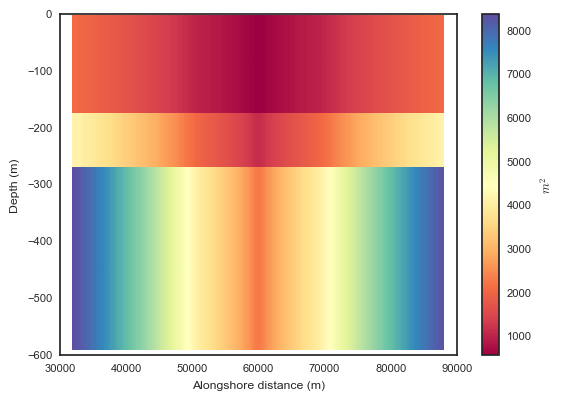

In [41]:
apcol = plt.pcolor(grid.X.isel(X=slice(60,300)),grid.Z.isel(Z=slice(0,60)),areas, cmap='Spectral')
cb=plt.colorbar(apcol,label='$m^2$')
plt.ylabel('Depth (m)')
plt.xlabel('Alongshore distance (m)')
